# Задание: сборка PDF документа
Используя данные по посещаемости библиотек в районах Москвы

https://video.ittensive.com/python-advanced/data-7361-2019-11-28.utf.json

In [1]:
import requests
import json
import pandas as pd
from PyPDF3 import PdfFileMerger, PdfFileReader
from reportlab.pdfgen import canvas
from reportlab.lib import pagesizes
from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.ttfonts import TTFont
from reportlab.lib.utils import ImageReader
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import rcParams
rcParams['figure.figsize'] = (8, 10)

data_df = pd.DataFrame(
    json.loads(requests.get('https://video.ittensive.com/python-advanced/data-7361-2019-11-28.utf.json').content),
    columns=['NumOfVisitors', 'ObjectAddress']
)

постройте **круговую диаграмму суммарной посещаемости** (NumOfVisitors) **20 наиболее популярных районов Москвы**.

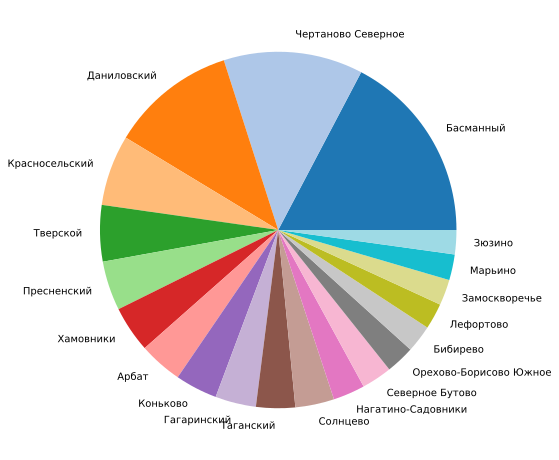

In [2]:
data_df['district'] = data_df['ObjectAddress'].map(lambda content: content[0]['District'].replace('район', '').replace('поселение', '').replace('"', '').strip())
top20 = data_df.groupby('district')['NumOfVisitors'].sum().sort_values(ascending=False)[:20]
top20.plot(kind='pie', cmap='tab20', ylabel='')
plt.savefig('top20_libraries.png', dpi=300);

Создайте PDF отчет, используя файл

https://video.ittensive.com/python-advanced/title.pdf

как первую страницу. На второй странице выведите **итоговую диаграмму, самый популярный район Москвы** и **число посетителей библиотек в нем**.

In [3]:
tmp_pdf = canvas.Canvas('tmp.pdf', pagesize=pagesizes.A4)
pdfmetrics.registerFont(TTFont('Trebuchet', 'https://video.ittensive.com/python-advanced/Trebuchet.ttf'))

tmp_pdf.drawImage(ImageReader('top20_libraries.png'), 50, 200, width=500, height=700)
tmp_pdf.setFont('Trebuchet', 14)
tmp_pdf.drawString(150, 820, 'Самый популярный район Москвы - ' + top20.index[0] + ',')
tmp_pdf.drawString(150, 800, 'с числом посетителей библиотек в нём ' + str(top20[0].astype(int)) + '.')
tmp_pdf.save()

with open('title.pdf', 'rb') as source_pdf:
    merger = PdfFileMerger()
    merger.append(source_pdf)
    with open('tmp.pdf', 'rb') as tmp_pdf:    
        merger.append(tmp_pdf)
        merger.write('homework_1_report.pdf')

## [Кликнуть сюда для просмотра полученного PDF](homework_1_report.pdf)

Сколько посетителей библиотек в районе Москвы с самой большой суммарной посещаемостью библиотек?

In [4]:
print(
    'Самый популярный район Москвы - ' + top20.index[0] + ', с числом посетителей библиотек в нём '\
    + str(top20[0].astype(int)) + '.'
)

Самый популярный район Москвы - Басманный, с числом посетителей библиотек в нём 765402.
